In [8]:
# Applied Data Science Assignment 3

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [9]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

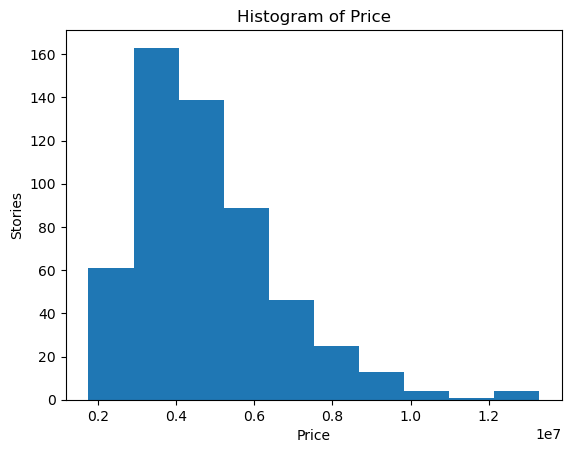

In [10]:
# Univariate Analysis through Histogram

plt.hist(df['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Stories')
plt.title('Histogram of Price')
plt.show()

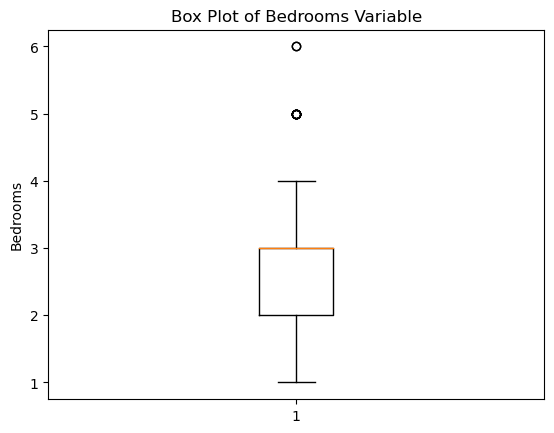

In [11]:
# Univariate Analysis through Box Plot

plt.boxplot(df['bedrooms'])
plt.ylabel('Bedrooms')
plt.title('Box Plot of Bedrooms Variable')
plt.show()

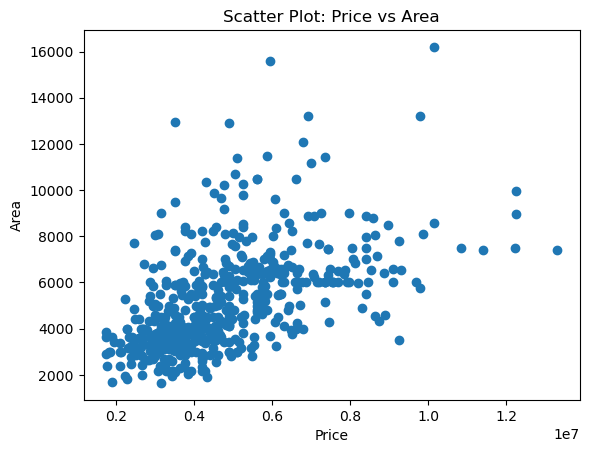

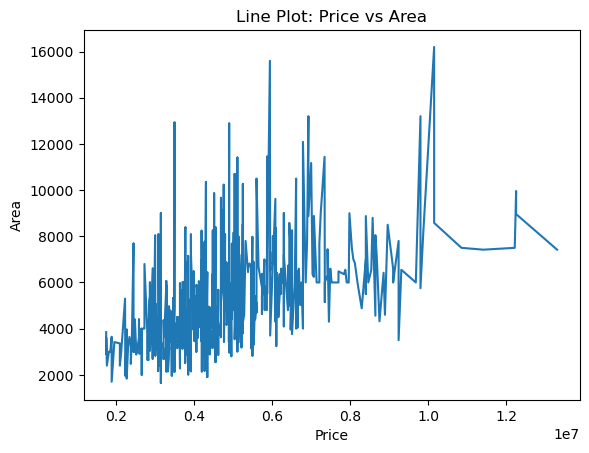

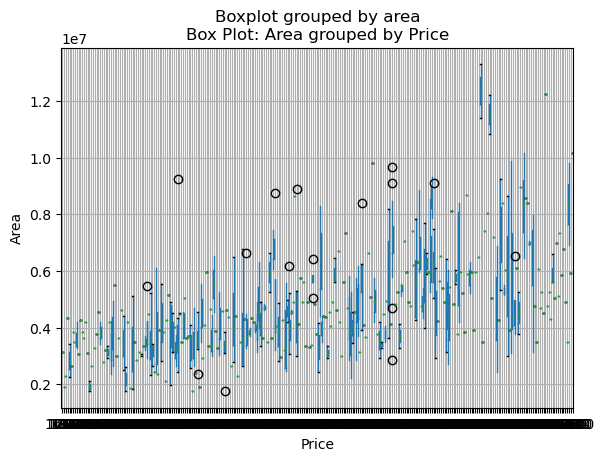

          price      area
price  1.000000  0.535997
area   0.535997  1.000000


In [12]:
# Bivariate Analysis through Scatter Plot

plt.scatter(df['price'], df['area'])
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Scatter Plot: Price vs Area')
plt.show()

# Bivariate Analysis through Line plot

plt.plot(df['price'], df['area'])
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Line Plot: Price vs Area')
plt.show()

# Bivariate Analysis through Box plot

df.boxplot(column='price', by='area')
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Box Plot: Area grouped by Price')
plt.show()

# Bivariate Analysis through Correlation matrix

correlation_matrix = df[['price', 'area']].corr()
print(correlation_matrix)

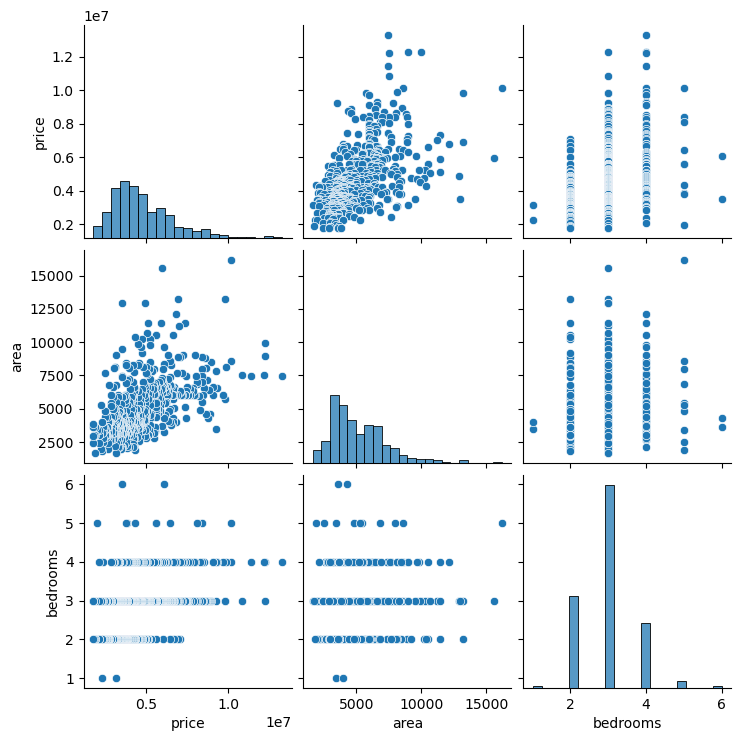

In [13]:
# Multivariate Analysis through Pairplot

sns.pairplot(df, vars=['price', 'area', 'bedrooms'])
plt.show()

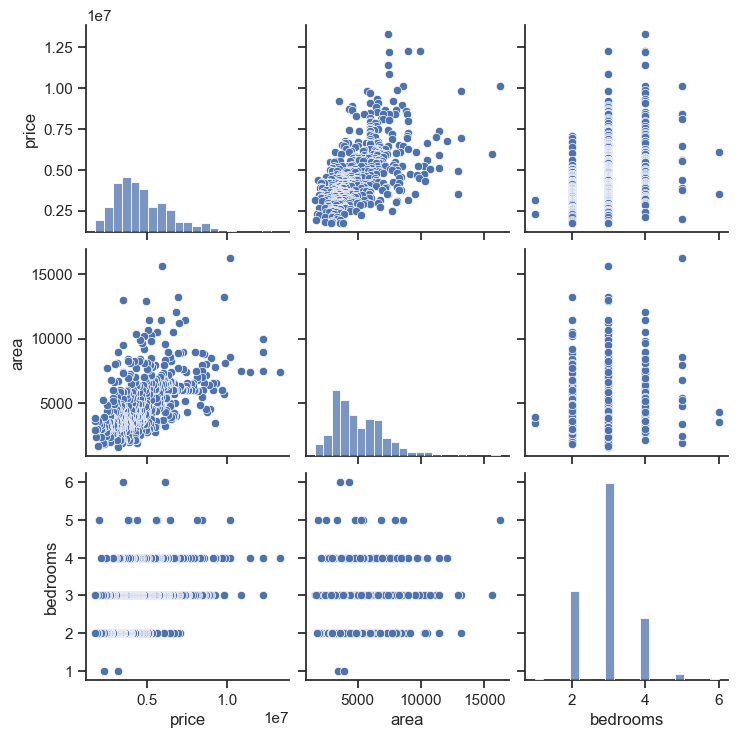

In [14]:
# Multivariate Analysis through Scatter plot matrix

sns.set(style='ticks')
sns.pairplot(df, vars=['price', 'area', 'bedrooms'], kind='scatter')
plt.show()

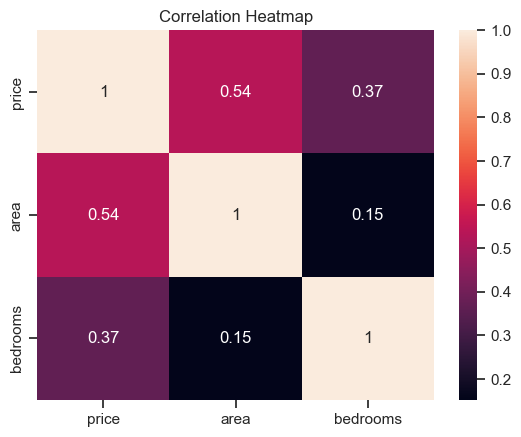

In [15]:
# Multivariate Analysis through Correlation Heatmap

correlation_matrix = df[['price', 'area', 'bedrooms']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Descriptive Statistics

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [17]:
df['area'].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

In [18]:
# Check missing values

missing_values = df.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [19]:
# Defining the columns for which we want to detect outliers
columns_to_check = ['price', 'area']

# Calculate the IQR for each column
Q1 = df [columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Detecting outliers based on the IQR method
outliers = ((df[columns_to_check] < (Q1 - 1.5 * IQR)) | (df[columns_to_check] > (Q3 + 1.5 * IQR)))

# Replacing outliers with the median value
df[outliers] = np.nan  # Replacing outliers with NaN
df_filled = df.fillna(df.median())  # Replacing NaN with the median

# Printing the outliers detected
print(outliers)

# Printing the dataset after replacing outliers
print(df_filled)

     price   area
0     True  False
1     True  False
2     True  False
3     True  False
4     True  False
..     ...    ...
540  False  False
541  False  False
542  False  False
543  False  False
544  False  False

[545 rows x 2 columns]
         price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0    4270000.0  7420.0         4          2        3      yes        no   
1    4270000.0  8960.0         4          4        4      yes        no   
2    4270000.0  9960.0         3          2        2      yes        no   
3    4270000.0  7500.0         4          2        2      yes        no   
4    4270000.0  7420.0         4          1        2      yes       yes   
..         ...     ...       ...        ...      ...      ...       ...   
540  1820000.0  3000.0         2          1        1      yes        no   
541  1767150.0  2400.0         3          1        1       no        no   
542  1750000.0  3620.0         2          1        1      yes        no   
543  17500

C:\Users\prani\AppData\Local\Temp\ipykernel_14092\1842119049.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.median())  # Replacing NaN with the median


In [21]:
# Label Encoding for guestroom

label_encoder = LabelEncoder()
for column in categorical_columns:
    df['guestroom'] = label_encoder.fit_transform(df['guestroom'])

print(df)

NameError: name 'categorical_columns' is not defined

In [46]:
# Label Encoding for mainroad

label_encoder = LabelEncoder()
for column in categorical_columns:
    df['mainroad'] = label_encoder.fit_transform(df['msinr'])

print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

    basement hotwaterheating airconditioning  parking furnishingstatus  
0         no              no          

In [47]:
# Label Encoding for hotwaterheating

label_encoder = LabelEncoder()
for column in categorical_columns:
    df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])

print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

    basement  hotwaterheating airconditioning  parking furnishingstatus  
0         no                0        

In [51]:
# Label Encoding for airconditioning

label_encoder = LabelEncoder()
for column in categorical_columns:
    df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])

print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

    basement  hotwaterheating  airconditioning  parking furnishingstatus  
0         no                0       

In [53]:
# Split the data into dependent and independent variables
X = df.iloc[:, :-1]  # Select all columns except the last one as independent variables
y = df.iloc[:, -1]   # Select the last column as the dependent variable

# Print the independent variables (X)
print(X)

# Print the dependent variable (y)
print(y)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

    basement  hotwaterheating  airconditioning  parking  
0         no                0                1       

In [5]:
X = df[['area', 'bedrooms', 'bathrooms',
               'stories', 'parking']]
y = df['price']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [7]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 
lm.fit(X_train,y_train) 

LinearRegression()

In [8]:
print(lm.intercept_)

-245989.43902394176


In [9]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
area,3.492829e+02
bedrooms,1.283724e+05
bathrooms,1.232385e+06
stories,5.085921e+05
parking,4.068285e+05


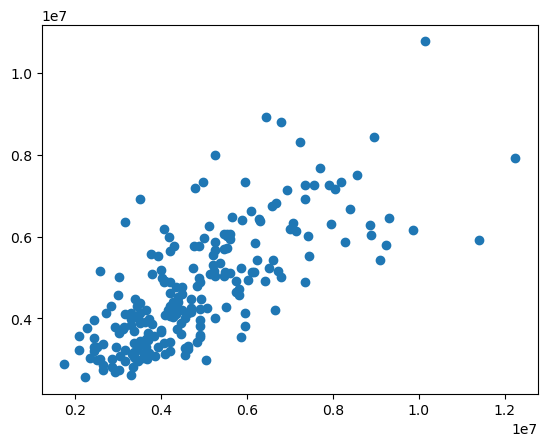

In [10]:
predictions = lm.predict(X_test)  
plt.scatter(y_test,predictions)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


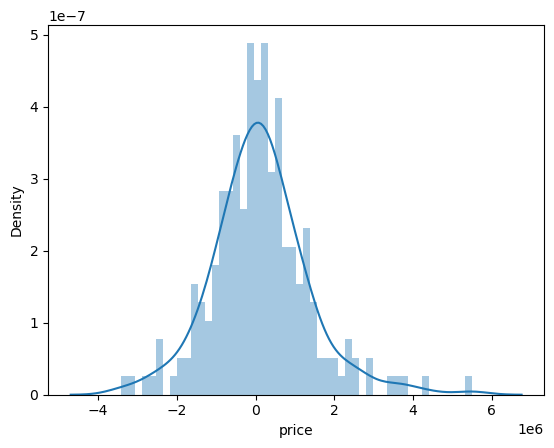

In [11]:
sns.distplot((y_test-predictions),bins=50); 

In [ ]:
from sklearn import metrics

mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)
Mean Squared Error: 0.14268744138998152